In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

BUSINESS UNDERSTANDING

explain the reaoning/proposal

DATA UNDERSTANDING

#explain the data

???

LOADING & EDA ANALYSIS

In [2]:
# Loading dataset that contains monthly
dfmonthly= pd.read_csv('final_a.csv')
#loading data that has closing dates annually
dfclosing= pd.read_csv('Closing_date.csv')
#loading the data with opening dates annually
dfopening= pd.read_excel('yearly opening.xlsx')
#loading the averaged yearly data
dfaverage= pd.read_csv('Yearly_ava.csv')

We loaded all 4 datasets, however for the EDA and initial visualization analysis, we shall use dfmonthly and dfaverage. The dfopening and dfclosing may appear in latter stages of the project. They have been loaded on because the cleaning stemps will still apply to them as well 

In [3]:
print(dfmonthly.shape)
dfmonthly.info()

(228, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           228 non-null    object 
 1   12-Month Inflation(%)                          228 non-null    float64
 2   Total Remittances                              228 non-null    float64
 3   Total Debt                                     204 non-null    float64
 4   Imports                                        228 non-null    int64  
 5   Exports                                        228 non-null    int64  
 6   Foreign direct investment                      228 non-null    float64
 7   IBRD loans and IDA credits (DOD, current US$)  228 non-null    int64  
 8   Unemployment Rate                              228 non-null    float64
 9   exchange_rate                               

We have 228 rows of data in the monthly data set. 

In [4]:
print(dfaverage.shape)
dfaverage.info()

(19, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           19 non-null     int64  
 1   12-Month Inflation(%)                          19 non-null     float64
 2   Total Remittances                              19 non-null     float64
 3   Total Debt                                     17 non-null     float64
 4   Imports                                        19 non-null     int64  
 5   Exports                                        19 non-null     int64  
 6   Foreign direct investment                      19 non-null     float64
 7   IBRD loans and IDA credits (DOD, current US$)  19 non-null     int64  
 8   Unemployment Rate                              19 non-null     float64
 9   exchange_rate                                  

We have 19 rows in the yearly average as we are only using the yearly average across the months.

In [5]:
print('\nMissing values in the monthly data are as follows;\n')
print(dfmonthly.isnull().sum())


Missing values in the monthly data are as follows;

Date                                              0
12-Month Inflation(%)                             0
Total Remittances                                 0
Total Debt                                       24
Imports                                           0
Exports                                           0
Foreign direct investment                         0
IBRD loans and IDA credits (DOD, current US$)     0
Unemployment Rate                                 0
exchange_rate                                     0
Deposit                                           0
Savings                                           0
Lending                                           0
Overdraft                                         0
Interbank Rate                                    0
91-Day Tbill                                      0
182-days Tbill                                    0
364-days Tbill                                    0
Cash Reserv

In [6]:
print('\nMissing values in the monthly data are as follows')
print(dfaverage.isnull().sum())


Missing values in the monthly data are as follows
Date                                             0
12-Month Inflation(%)                            0
Total Remittances                                0
Total Debt                                       2
Imports                                          0
Exports                                          0
Foreign direct investment                        0
IBRD loans and IDA credits (DOD, current US$)    0
Unemployment Rate                                0
exchange_rate                                    0
Deposit                                          0
Savings                                          0
Lending                                          0
Overdraft                                        0
Interbank Rate                                   0
91-Day Tbill                                     0
182-days Tbill                                   0
364-days Tbill                                   4
Cash Reserve Requirement       

Considering the few values we have missing in the monthly, we shall fill these with mean later on.

In [7]:
dfmonthly.describe()

,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Deposit,Savings,Lending,Overdraft,Interbank Rate,91-Day Tbill,Cash Reserve Requirement,Central Bank Rate
count,228.000000,228.000000,2.040000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,211.000000
mean,7.581096,148026.619123,2.873573e+06,1.666794e+10,9.954672e+09,-4.252783e+08,5.434430e+09,3.605263,92.866645,6.122018,2.667061,14.392456,14.206667,6.817851,8.250618,5.104167,9.137441
std,3.969982,104365.181010,2.210692e+06,4.792054e+09,2.188579e+09,4.953038e+08,3.014285e+09,1.238793,18.254012,1.501907,1.688546,2.133058,2.281529,3.943125,2.852604,0.604548,2.392711
min,1.850000,26056.000000,7.211873e+05,6.739990e+09,5.341992e+09,-1.364485e+09,2.663224e+09,2.650000,61.980000,3.080000,0.960000,11.750000,11.150000,0.980000,1.600000,4.250000,5.750000
25%,5.060000,53352.255000,1.003756e+06,1.252904e+10,8.138888e+09,-7.709787e+08,3.156096e+09,2.740000,77.982500,4.497500,1.500000,12.837500,12.800000,4.617500,7.017500,4.500000,7.625000
50%,6.440000,116582.670000,1.930435e+06,1.771164e+10,1.044871e+10,-3.526285e+08,4.199127e+09,2.770000,89.507500,6.545000,1.705000,13.735000,13.650000,6.410000,7.930000,5.250000,8.750000
75%,8.402500,222000.115000,4.497684e+06,2.027930e+10,1.147124e+10,-5.181906e+07,7.124964e+09,5.010000,103.233750,7.170000,3.645000,15.295000,15.205000,7.790000,8.777500,5.250000,10.000000
max,19.720000,378053.010000,8.206740e+06,2.460558e+10,1.395358e+10,3.871569e+08,1.246476e+10,5.810000,153.240000,10.100000,7.010000,20.340000,20.530000,28.900000,21.650000,6.000000,18.000000


In [8]:
dfaverage.describe()

,Date,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Deposit,Savings,Lending,Overdraft,Interbank Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash Reserve Requirement,Central Bank Rate
count,19.000000,19.000000,19.000000,1.700000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,15.000000,19.000000,19.000000
mean,2014.000000,7.537193,146326.165138,2.801363e+06,1.637003e+10,1.000431e+10,-4.643991e+08,5.306915e+09,3.550910,92.072370,6.122018,2.667061,14.392456,14.206667,6.817851,8.250618,9.145498,10.233824,5.104167,9.175449
std,5.627314,3.268082,105564.810988,2.162142e+06,5.078197e+09,2.251298e+09,4.851279e+08,2.995330e+09,1.209339,16.402301,1.470921,1.637791,2.045124,2.181995,2.896828,2.067450,2.176165,2.336961,0.605283,1.931177
min,2005.000000,3.994826,31824.890690,7.434236e+05,6.739990e+09,5.341992e+09,-1.364485e+09,2.663224e+09,2.650000,67.466660,4.059167,1.194167,11.995833,11.443333,1.785000,3.599167,3.806667,4.485000,4.250000,6.423745
25%,2009.500000,5.289195,52365.604715,1.046621e+06,1.201744e+10,8.624490e+09,-7.709787e+08,3.195911e+09,2.745000,78.279057,4.409167,1.567083,12.974167,13.100833,4.767500,6.937542,7.876250,9.025000,4.593750,8.222787
50%,2014.000000,6.401048,119092.717100,1.944569e+06,1.766941e+10,1.058299e+10,-3.526285e+08,4.199127e+09,2.770000,88.866587,6.591667,1.695000,13.667500,13.680000,6.711667,8.173333,8.890833,10.371667,5.250000,8.854675
75%,2018.500000,9.217276,224335.952300,4.307819e+06,2.016735e+10,1.140633e+10,-6.104443e+07,5.801797e+09,4.280000,102.455230,7.084583,3.414583,15.602500,15.570000,8.193333,8.827917,10.076818,11.325417,5.250000,9.801915
max,2023.000000,16.266504,349391.830000,7.731912e+06,2.460558e+10,1.395358e+10,3.836136e+08,1.246476e+10,5.810000,123.420000,8.294167,6.365000,19.648333,19.853333,13.638333,12.755833,13.541667,14.345833,6.000000,15.791339


The difference is minimal to nearly zero for the data set spread and as such we can use them interchangeably.

## Handling missing values



We shall replace the missing data by mean, as the deviations are and should be very low across all the dataframes

In [9]:
for df in [dfaverage, dfclosing, dfmonthly, dfopening]:
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            if df[col].isnull().any():
                df[col].fillna(df[col].mean(), inplace=True)

We shall make the columns numeric except for Date which we shall convert to datetime and make an index prior to beginnning visualization.

In [10]:
for df in [dfaverage, dfclosing, dfmonthly, dfopening]:
    for col in df.columns:
        if col != 'Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
dfmonthly.isna().sum()

Date                                              0
12-Month Inflation(%)                             0
Total Remittances                                 0
Total Debt                                        0
Imports                                           0
Exports                                           0
Foreign direct investment                         0
IBRD loans and IDA credits (DOD, current US$)     0
Unemployment Rate                                 0
exchange_rate                                     0
Deposit                                           0
Savings                                           0
Lending                                           0
Overdraft                                         0
Interbank Rate                                    0
91-Day Tbill                                      0
182-days Tbill                                    1
364-days Tbill                                   64
Cash Reserve Requirement                          0
Central Bank

We shall convert the Date columns in all the datasets to allow for visualization.

In [12]:
for df in [dfaverage, dfclosing, dfmonthly, dfopening]:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)

## Visualization of the different features against Exchange rate over Time

## Exchange Rate

Using the monthly data set, we shall plot Exchange rate

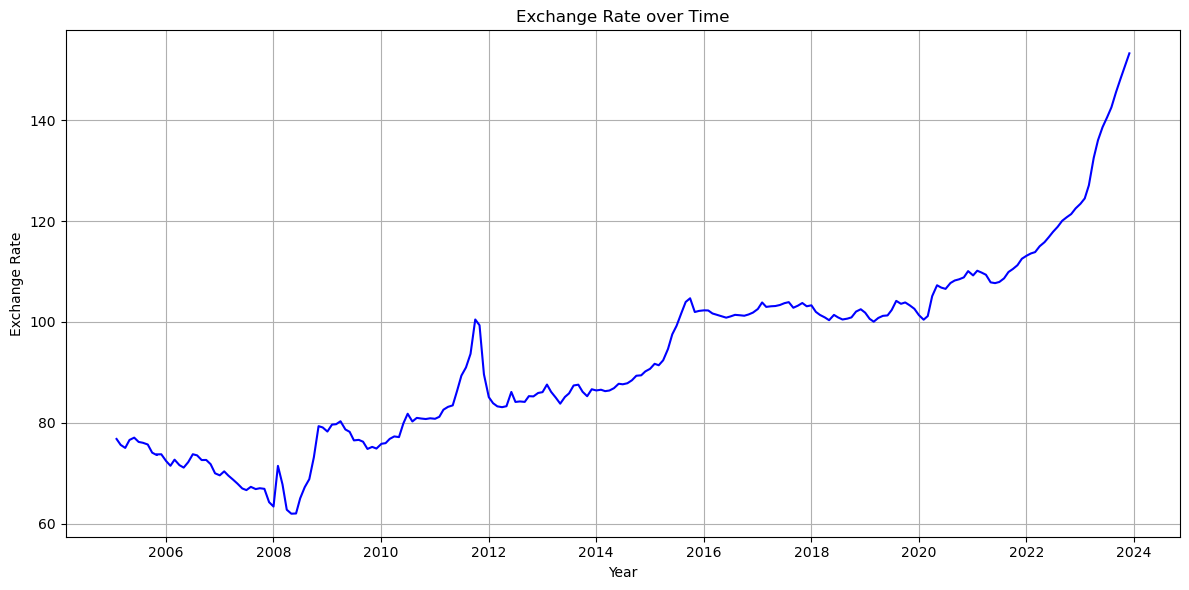

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", color="blue")
plt.title("Exchange Rate over Time")
plt.ylabel("Exchange Rate")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

COMMENTS here about the plot

## Deposit, Savings, Lending and Over-Draft

We shall combine the above plots as they are very closely inter-related.

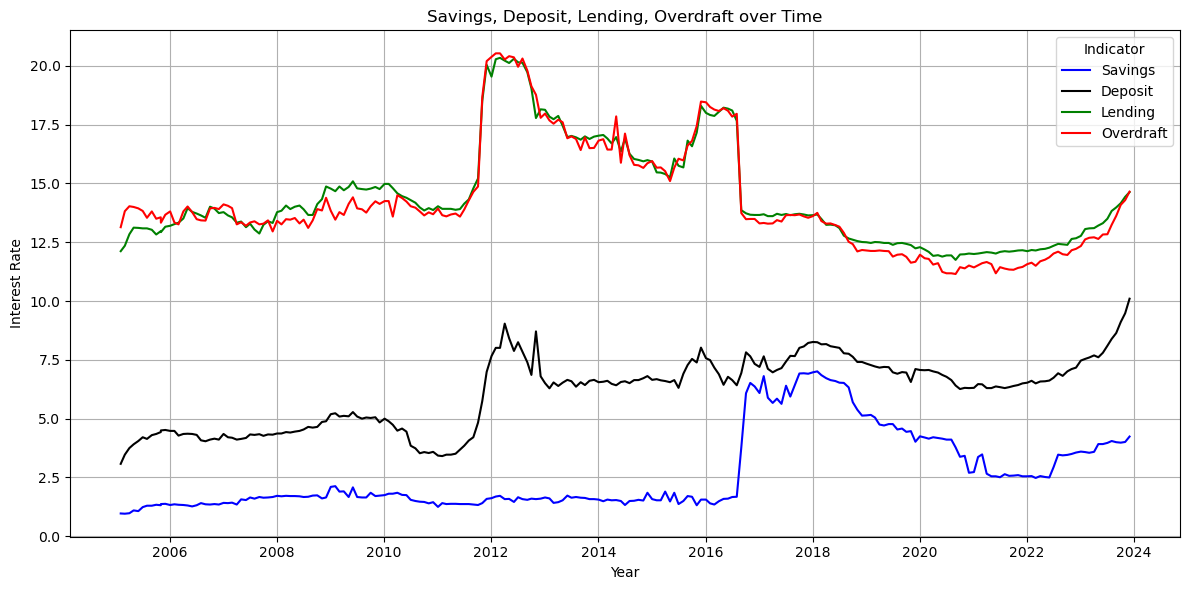

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfmonthly, x="Date", y="Savings", color="blue",label="Savings")
sns.lineplot(data=dfmonthly, x="Date", y="Deposit", color="black",label="Deposit")
sns.lineplot(data=dfmonthly, x="Date", y="Lending ", color="green",label="Lending")
sns.lineplot(data=dfmonthly, x="Date", y="Overdraft ", color="red",label="Overdraft")
plt.title("Savings, Deposit, Lending, Overdraft over Time")
plt.ylabel("Interest Rate")
plt.xlabel("Year")
plt.legend(title="Indicator")
plt.grid(True)
plt.tight_layout()
plt.show()

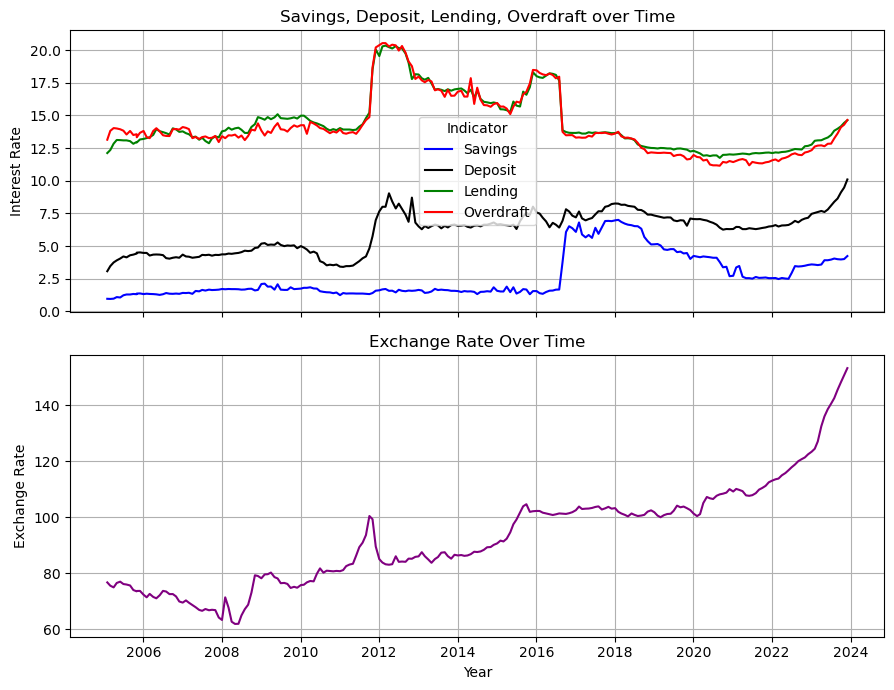

In [15]:
#we shall stack the plots ontop of each other to get a clearer side by side analysis on the movements.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7), sharex=True)

sns.lineplot(data=dfmonthly, x="Date", y="Savings", color="blue", label="Savings", ax=ax1)
sns.lineplot(data=dfmonthly, x="Date", y="Deposit", color="black", label="Deposit", ax=ax1)
sns.lineplot(data=dfmonthly, x="Date", y="Lending ", color="green", label="Lending", ax=ax1)
sns.lineplot(data=dfmonthly, x="Date", y="Overdraft ", color="red", label="Overdraft", ax=ax1)

ax1.set_title("Savings, Deposit, Lending, Overdraft over Time")
ax1.set_ylabel("Interest Rate")
ax1.legend(title="Indicator")
ax1.grid(True)

sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", color="purple", ax=ax2)
ax2.set_title("Exchange Rate Over Time")
ax2.set_ylabel("Exchange Rate")
ax2.set_xlabel("Year")
ax2.grid(True)

plt.tight_layout()
plt.show()

TAlk about the line movement

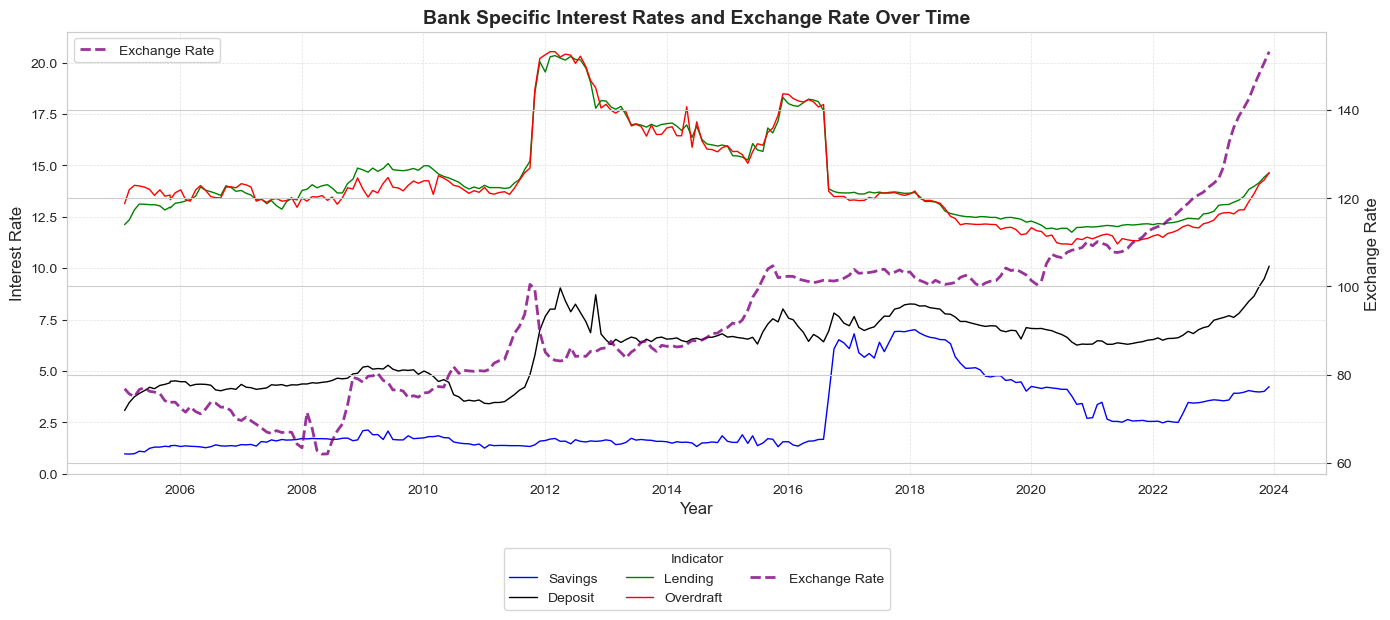

In [16]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="Savings", ax=ax1, label="Savings", color="blue", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Deposit", ax=ax1, label="Deposit", color="black", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Lending ", ax=ax1, label="Lending", color="green", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Overdraft ", ax=ax1, label="Overdraft", color="red", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Bank Specific Interest Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.show()

Comment

## Interbank, Central Bank Rate

COMMENT We shall combine the plots for Interbank, Central Bank rate. We shall then view these against the exchange rate. As the former four are very closely inter-related.

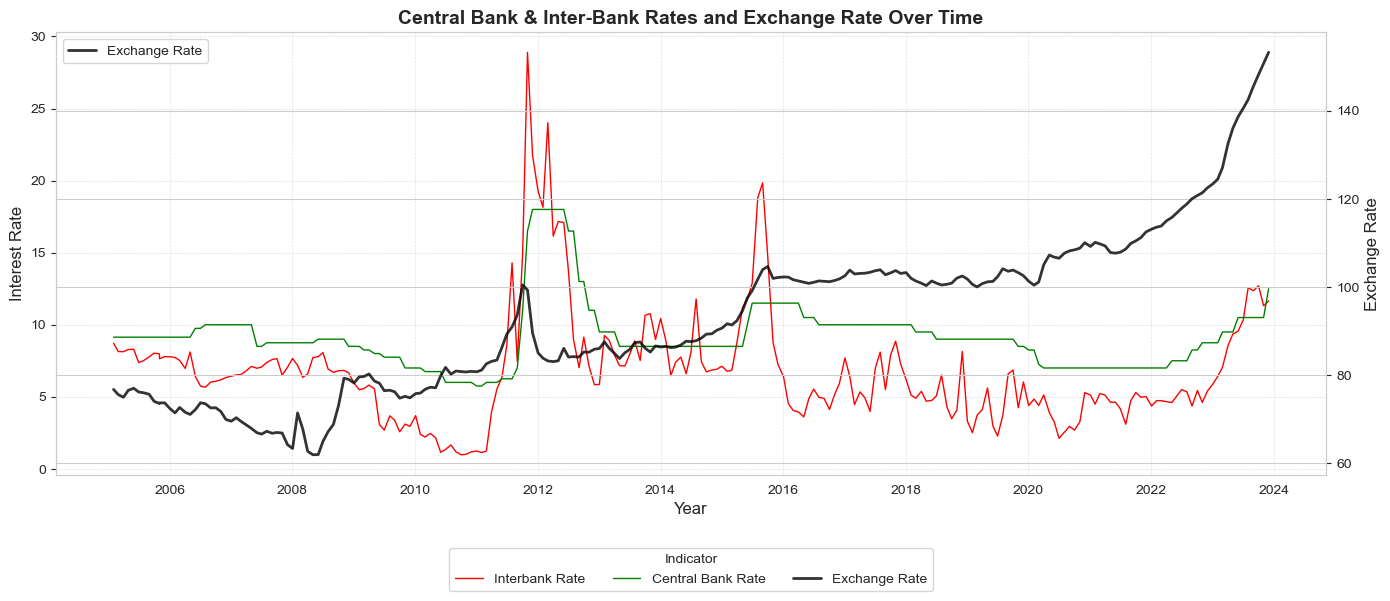

In [17]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="Interbank Rate", ax=ax1, label="Interbank Rate", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Central Bank Rate", ax=ax1, label="Central Bank Rate", color="green", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Central Bank & Inter-Bank Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

Explanation; why we didnt add cash reserve(stability), the spikes, 

## Treasury Bills (91-Day, 182-Days, 364-Days)

We shall combine the plots for Treasury Bills. We shall then view these against the exchange rate. As the former four are very closely inter-related.

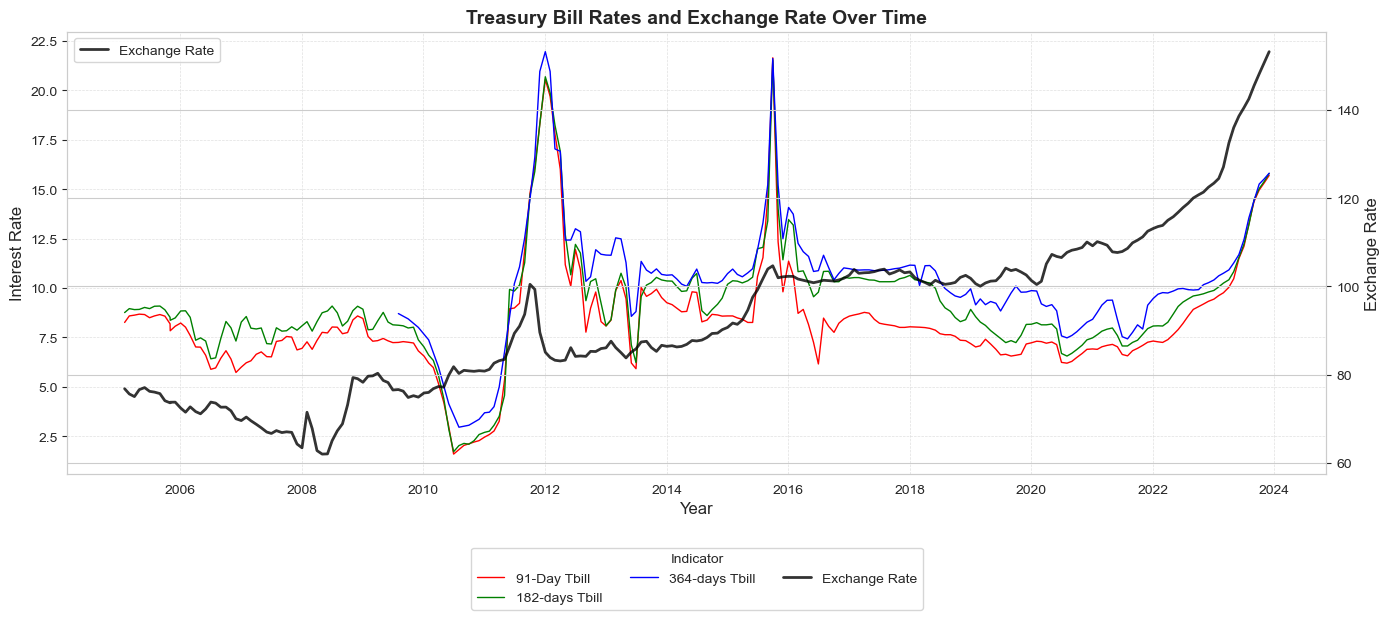

In [18]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="91-Day Tbill", ax=ax1, label="91-Day Tbill", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="182-days Tbill", ax=ax1, label="182-days Tbill", color="green", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="364-days Tbill", ax=ax1, label="364-days Tbill", color="blue", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Treasury Bill Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.show()

Explanation; missing value on 364-bill(left blank due to straight line), spikes relation. but closer relationship.

## Total Remittances and Total Debt

We shall combine the plots for Total Remittances and Total Debt. We shall then view these against the exchange rate. As the former four are very closely inter-related.

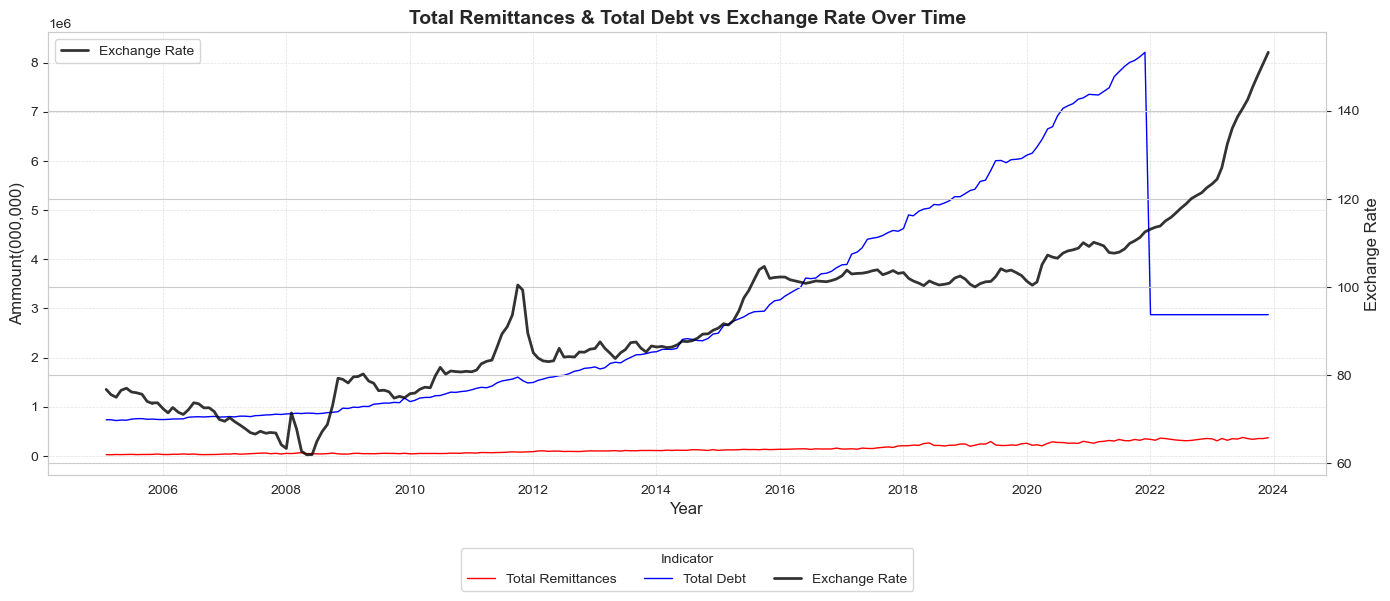

In [19]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="Total Remittances ", ax=ax1, label="Total Remittances", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Total Debt", ax=ax1, label="Total Debt", color="blue", linewidth=1)

ax1.set_ylabel("Ammount(000,000)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Total Remittances & Total Debt vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

Explanation ; lowmovement on remittances, yet high correlation, close movement in debt yet lower correlation.

## Inflation

We shall combine the plots for Inflation. We shall then view these against the exchange rate. As the former four are very closely inter-related.

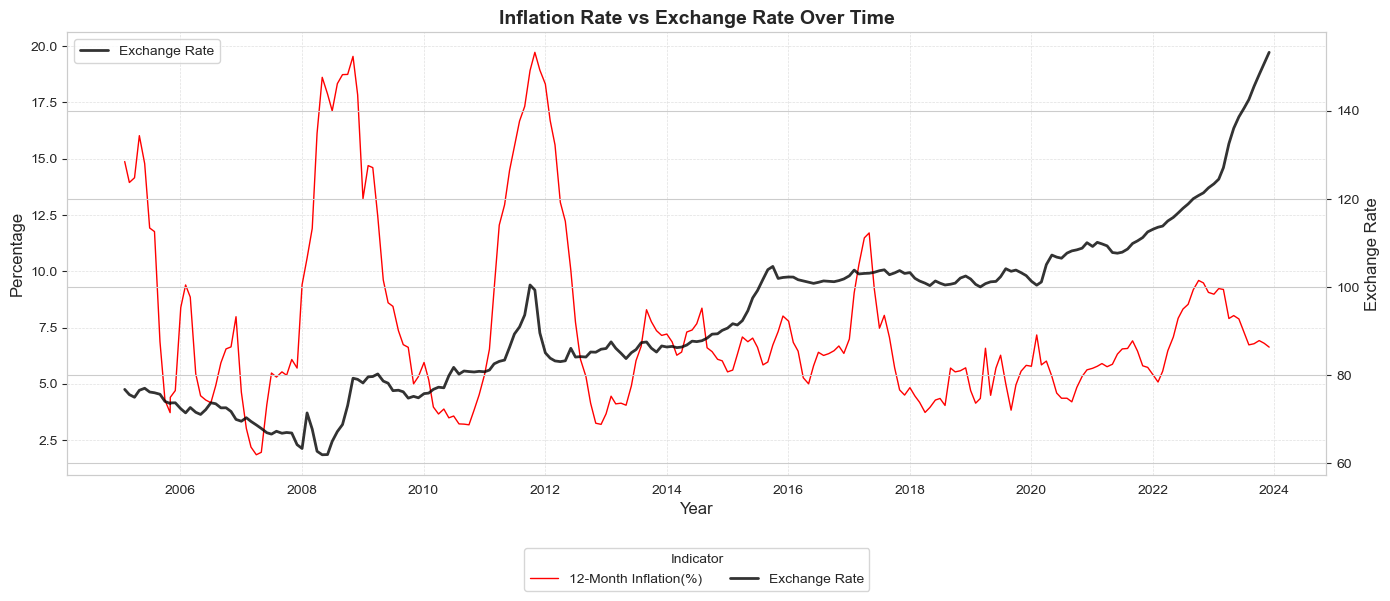

In [20]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="12-Month Inflation(%)", ax=ax1, label="12-Month Inflation(%)", color="red", linewidth=1)

ax1.set_ylabel("Percentage", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Inflation Rate vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.show()

slight spike correlation, but stability later on ????? explain

## Imports and Exports

explain shift to dfaverage

We shall combine the plots for Imports and Exports. We shall then view these against the exchange rate. As the former four are very closely inter-related.

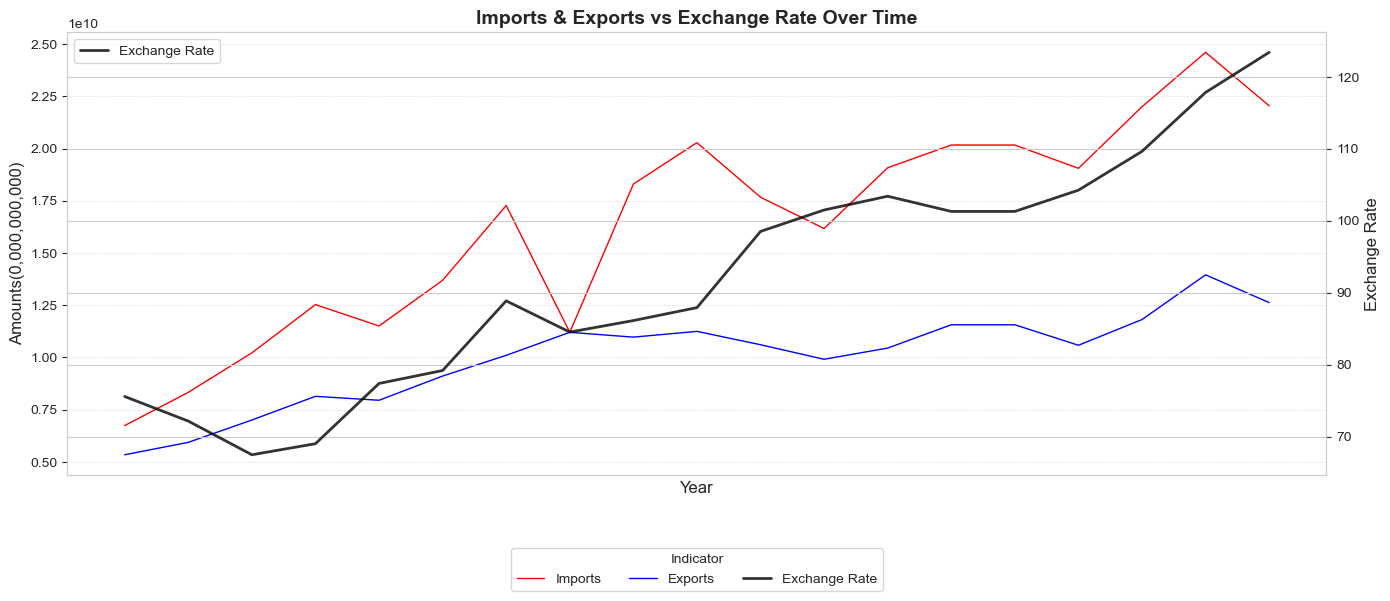

In [21]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfaverage, x="Date", y="Imports", ax=ax1, label="Imports", color="red", linewidth=1)
sns.lineplot(data=dfaverage, x="Date", y="Exports", ax=ax1, label="Exports", color="blue", linewidth=1)

ax1.set_ylabel("Amounts(0,000,000,000)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Imports & Exports vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfaverage, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

close relation between imports and rates, also exports move similarly, explain how spikes increase however drops have minimal to no effect. Explain we used a different data set.

## Foreign Direct Investment and IBRD loans and IDA credits (DOD, current US$)

We shall combine the plots for FDI and IBRD. We shall then view these against the exchange rate. As the former four are very closely inter-related.

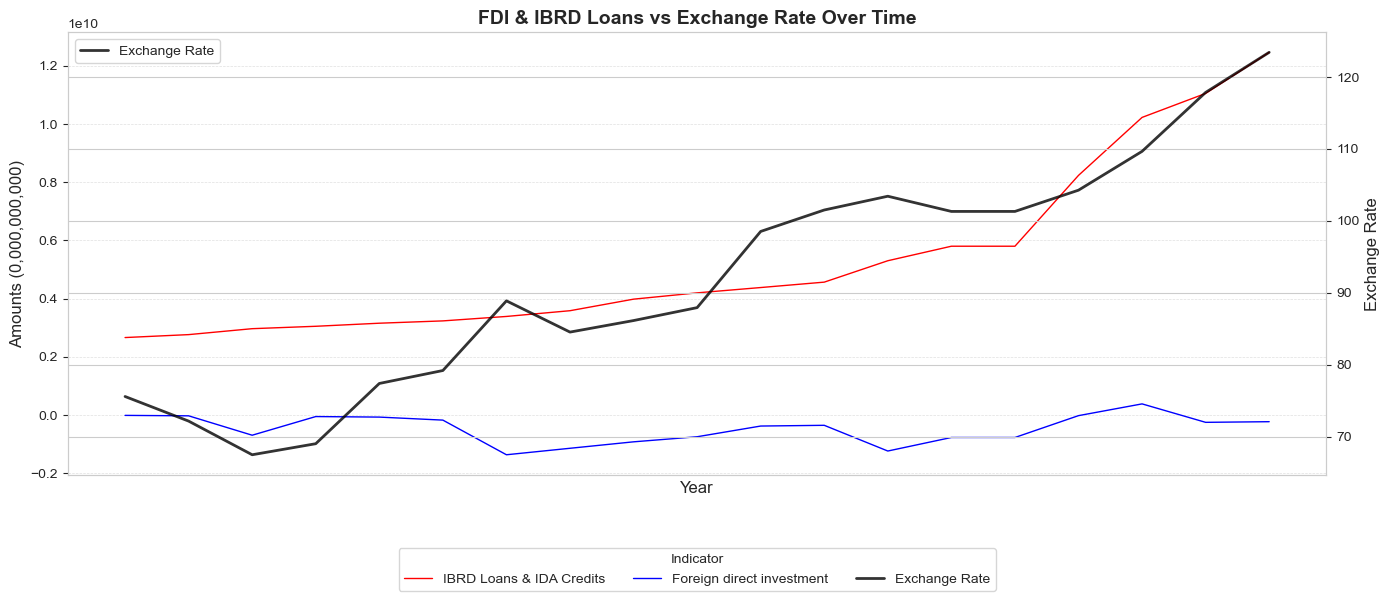

In [22]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfaverage, x="Date", y="IBRD loans and IDA credits (DOD, current US$)", ax=ax1, label="IBRD Loans & IDA Credits", color="red", linewidth=1)
sns.lineplot(data=dfaverage, x="Date", y="Foreign direct investment", ax=ax1, label="Foreign direct investment", color="blue", linewidth=1)

ax1.set_ylabel("Amounts (0,000,000,000)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("FDI & IBRD Loans vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfaverage, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

Explanation. reliance on loans in comparison to investment

## Unemployment

We shall combine the plots for Unemployment. We shall then view these against the exchange rate. As the former four are very closely inter-related.

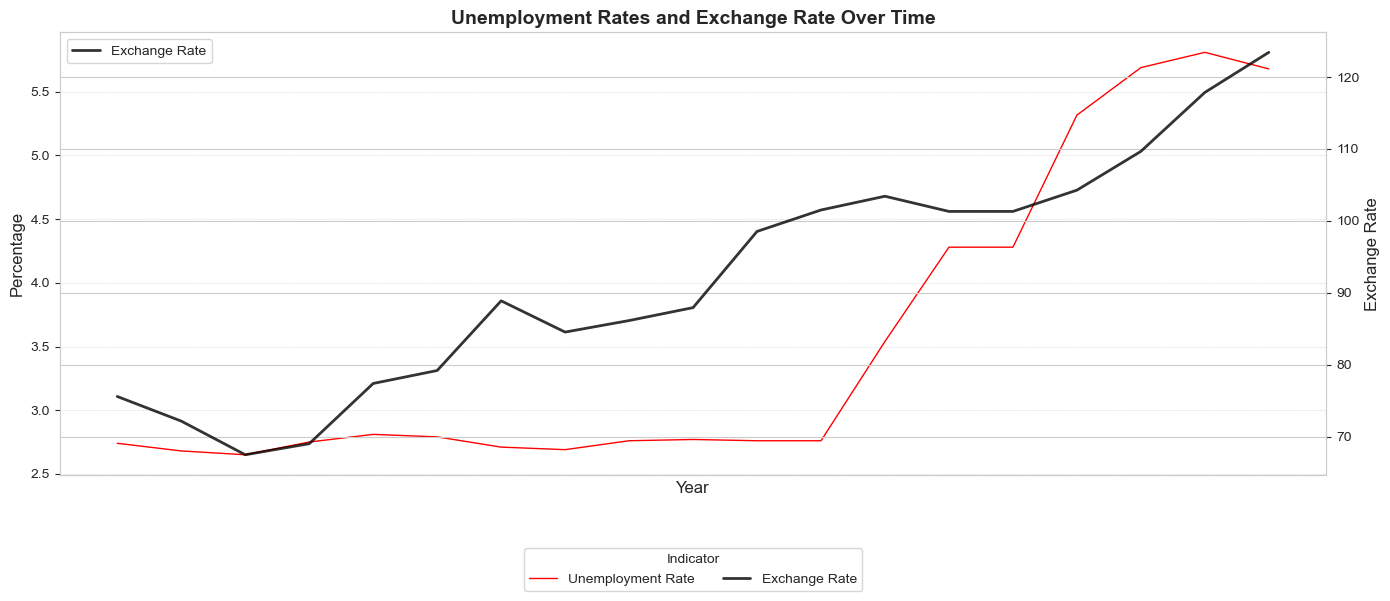

In [23]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfaverage, x="Date", y="Unemployment Rate", ax=ax1, label="Unemployment Rate", color="red", linewidth=1)

ax1.set_ylabel("Percentage", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Unemployment Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfaverage, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="black", linewidth=2, linestyle="-", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

Explain unemployment against exchange rate

## MODELLING